# Grain Boundary Analysis with LAMMPS backend

This is an example notebook to demonstrate the capabilities of `autogabi` using the LAMMPS backend.

In [1]:
import numpy as np
from autogabi.analysis import GBStructure
from autogabi.plotting import render_ovito

In [2]:
gb = GBStructure('lammps', 'LSF_supercell_md3.lmp', pair_style='buck/coul/long 12', kspace_style='pppm 1.0e-4')
gb.delete_particles('4')
gb.perform_cna(cutoff=4.75, compute=False)
gb.set_analysis()
gb_ions = gb.get_gb_atoms()

LAMMPS (29 Oct 2020)
  using 1 OpenMP thread(s) per MPI task
LAMMPS output is captured by PyLammps wrapper


In [3]:
print(len(gb_ions))

9697


In [4]:
gb2 = GBStructure('lammps', 'LSF_supercell_md3.lmp', pair_style='buck/coul/long 12', kspace_style='pppm 1.0e-4')

gb2.select_particles(gb_ions, expand=True, nearest_neighbors=1, invert=True, delete=True)
gb2.set_analysis()

LAMMPS (29 Oct 2020)
  using 1 OpenMP thread(s) per MPI task
LAMMPS output is captured by PyLammps wrapper


In [5]:
print("Number of Sr:", len(gb2.get_type(2)))
gb_cations = sum(len(gb2.get_type(i))for i in [1, 2, 3])
print("Number of cations:", gb_cations)
print("A-site fraction of Sr:", gb2.get_fraction([2], [1, 2])*100, '%')
print("Percentage of oxygen:", gb2.get_fraction([4], [1, 2, 3, 4])*100, '%')

TypeError: object of type 'NoneType' has no len()

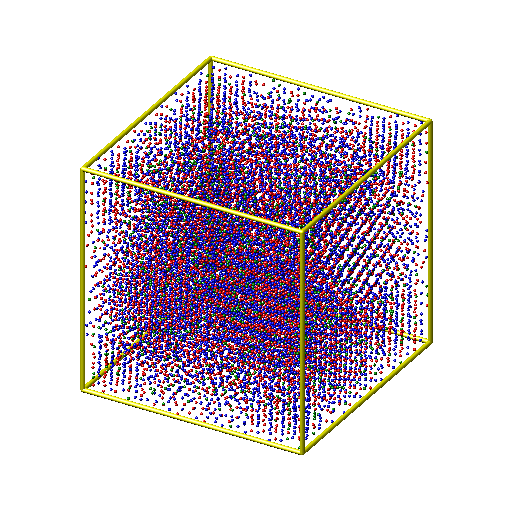

In [6]:
gb.pylmp.image()

In [ ]:
# list_ids = []
# for i in range(len(gb.pylmp.atoms)):
#     list_ids.append(gb.pylmp.atoms[i].id)

[print(i.id) for i in gb.pylmp.atoms if int(i.index) < len(gb.pylmp.atoms)]
# list_atoms = list(gb.pylmp.atoms)

In [ ]:
print(dir(gb.pylmp.atoms[0]))

print(len(gb.pylmp.lmp.numpy.extract_compute("cna_0", 1, 1)))
hist = np.histogram(gb.pylmp.lmp.numpy.extract_compute("cna_0", 1, 1))
print(hist)

In [ ]:
from lammps import LMP_STYLE_ATOM, LMP_TYPE_VECTOR
print(LMP_TYPE_VECTOR)
print(LMP_STYLE_ATOM)
print(gb.pylmp.lmp.numpy.extract_compute("cna_0", LMP_STYLE_ATOM, LMP_TYPE_VECTOR))
print(np.concatenate(gb.pylmp.lmp.numpy.extract_compute("cna_0", LMP_STYLE_ATOM, LMP_TYPE_VECTOR)))
#print(gb.pylmp.lmp.extract_atom("x",3))
array_1 = gb.pylmp.lmp.extract_compute("1",2,2)
array_gb = np.ctypeslib.as_array(gb.pylmp.lmp.extract_atom("x", 3).contents, shape=(41069,3))
#print(array_gb)
# https://discourse.julialang.org/t/analog-of-ctypeslib-as-array/7002

In [13]:

from datetime import datetime

filename = datetime.now().strftime("%d%m%Y_%H%M%S")
print(filename)

24112021_175736
